# ME 305 Homework 2: Model of Balancing Platform

__Author: Tori Borninio__

In this document we will develop a simplified model of a pivoting platform to be used for a controller that will balance a ball atop the platform.


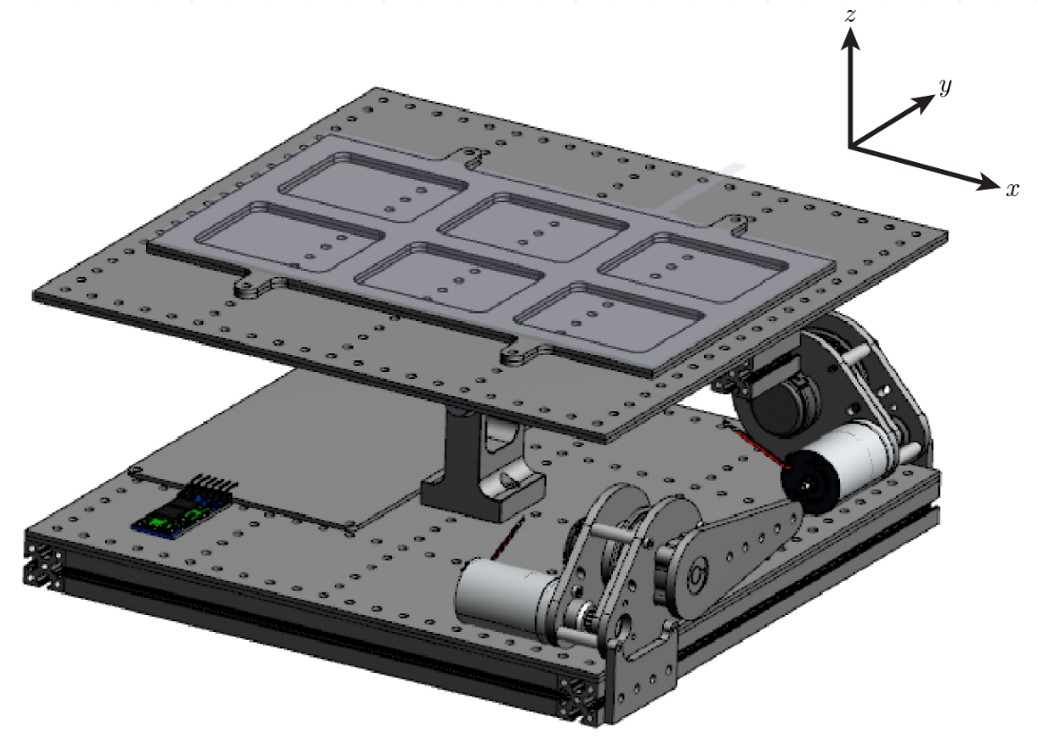

In [191]:
import sympy
import scipy
from scipy.integrate import solve_ivp
import numpy as np
from sympy import diff
from sympy.physics import vector
from sympy.physics import mechanics
from sympy.geometry import Point
import matplotlib.pyplot as plt
from sympy import Symbol
vector.init_vprinting()
from IPython.display import Image
Image(filename = "Images/1Pcad.jpg", width=400)

__Figure 1:__ Initial CAD render of pivoting platform. The first motor spins about its $x$-axis but tilts the platform about its $y$-axis and the second motor spins about its $y$-axis but tilts the platform about its $x$-axis. Recent revisions of the platform are slightly different but in small ways negligible to the modeling.


## Schematic

We will be considering the following features:<br>
>- Balancing platform hardware that pivots about point $O$ and is connected to two motors via puch rods and lever arms at points $P$ and $Q$.<br>
>- Motor push rods and lever arms.<br>
>- Ball of radius $r_B$


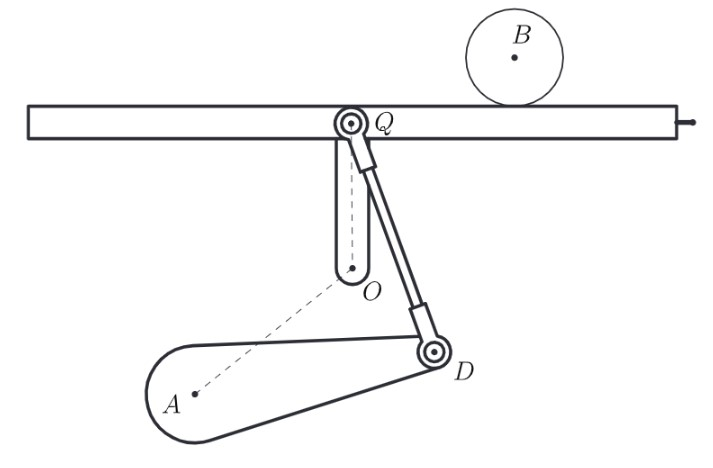

In [192]:
Image(filename = "Images/5ARMdims.jpg", width=400)

__Figure 2:__ Projected right-view of balancing platform. Points $A$ and $O$ are both fixed, but are
misaligned in all three dimensions. Point $D$ is a pivoted joint between the motor lever arm $AD$
and the push-rod $DQ$. The vertical motion at $Q$ causes the platform to tilt forward or backward
about a horizontal axis through $O$.

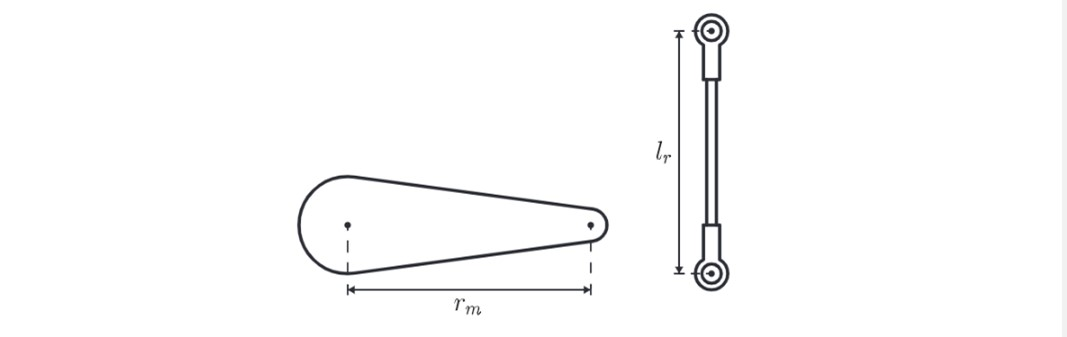

In [193]:
Image(filename = "Images/2ARMcad.jpg", width=400)

__Figure 3:__ Parameter definitions for lever arm and push-rod attached to motor.

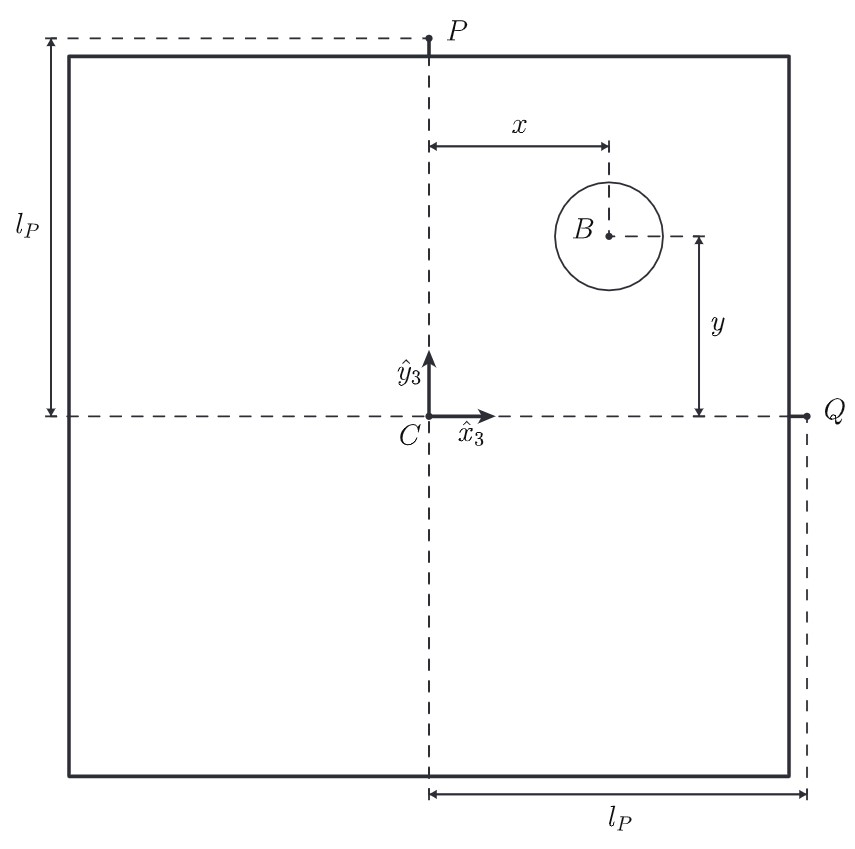

In [194]:
Image(filename = "Images/3Pdims.jpg", width=400)

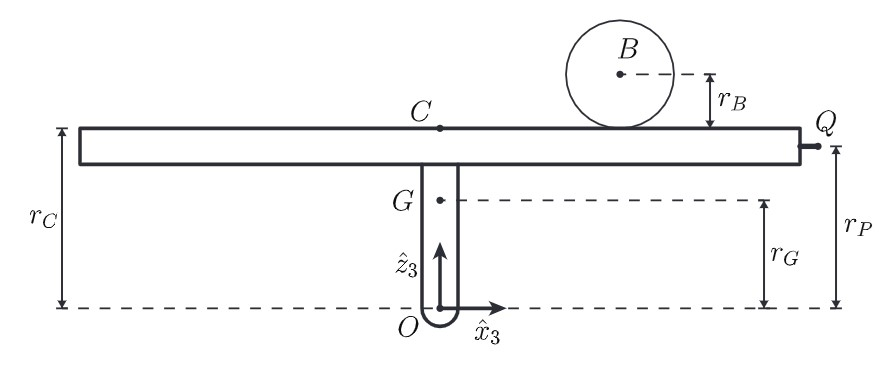

In [195]:
Image(filename = "Images/4Pdims.jpg", width=400)

__Figure 4:__ Parameter definitions for moving plate and ball. The center of mass of the ball is located
at point $B$. The ball is displaced a distance $x$ and and a distance $y$ in the coordinate system attached
to and moving with the plate, shown as $\hat x_3$, $\hat y_3$, and $\hat z_3$ in the figure.
***

## Modeling Assumptions

To simplify the model, we will make the following assumptions:
1. We will consider two uncoupled planes of motion for the platform. That is, instead of modeling the system as a balancing platform that can move in two degrees of freedom, we will model the system as a pair of balancing beams, each with one degree of freedom.
2. Since the mass of the platform is significantly larger than any components in the rest of the system, we will assume the masses and moments of inertia of the lever arms and push rods are negligible.
3. We will neglect friction within the lever arm and push rod joints.
4. We will assume a no slip condition between the ball and the plate to controll the ball.
5. We will assume small angle analysis, which has the effect of our lever arm remaining essentially horizontal and our push rod remaining essentially vertical with any motor rotation causing a vertical translation of the push rod.
6. We will assume that $\theta_y = 0$ when $\phi_x = 0$
***

## Two Dimensional Analytical Model

To develop the full model of the balancing platform, we will split the derivation into sections. 

1. Derivation of a kinematic relationship between the motion of the motor about point $A$ and the motion of the platform about point $O$.
2. Derivation of a kinematic expression for the motion of the ball with respect to point $O$ assuming no slip conditions.
3. Derivation of a relationship between the motor torque $T_x$ and the corresponding effective moment applied to the platform $M_y$.
4. Derive the equations of motion for the system by strategically summing moments about various points in the mechanism.

We will then manipulate this model to be represented into a linearized state space form.

### Kinematic relationship between motor angle and platform angle

First, we will determine a kinematic relationship between the motion of the motor about point $A$ and the motion of the platform about point $O$. <BR>

For this, we will have two planes of motion to consider. For the following schematics, we have left out components not considered for our model for clarity. According to Figure 2, the two planes are:

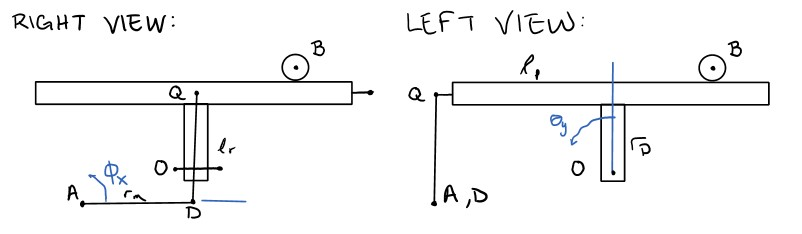

In [196]:
Image(filename = "Images/6Pgeo.jpg", width=400)

Throughout the motion, the orientation of the assembly diverges little from the shown reference orientation. This allows for the small angle approximation and: <br>
> $\omega_DQ = 0$ <br>

Therefore <br>

> $\vec V_Q = \vec V_D + \vec V_{Q/D}$ <br>
> $\vec V_Q = \vec V_D$

Because the push rod remains vertical, we will unfurl the two views into one plane with the motor arm and push rod rotated $90 ^{o}$. 

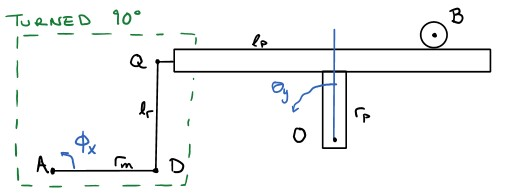

In [197]:
Image(filename = "Images/7Pgeo.jpg", width=400)

We know that the position of $D$ is given by: <br>

> $\vec {AD} = r_m \cos (\phi_x) \hat i + r_m \sin (\phi_x) \hat k$

Therefore the velocity of point $D$ is: <br>

> $\vec V_D = r_m \dot\phi_x \hat k$

Point $Q$ on the platform is given by: <br>

> $\vec {OQ} = r_p \sin(\theta_y) \hat i + r_p \cos(\theta_y) \hat k + \ell_p \cos(\theta_y) \hat i + \ell_p \sin(\theta_y) \hat k$

For small angles we have: <br>

> $\vec {OQ} = r_p \theta_y \hat i + r_p \hat k + \ell_p \hat i + \ell_p \theta_y \hat k$

Therefore the velocity of point $Q$ is: <br>

> $\vec V_Q = r_p \dot\theta_y \hat i + \ell_p \dot\theta_y \hat k$

Since $\ell_p >> r_p$ we have: <br>

> $\vec V_Q = \ell_p \dot\theta_y \hat k

Therefore, since <br> 

> $\vec V_D = \vec V_Q$ <br>
> $r_m \dot \phi_x = - \ell_p \dot \theta_y$ <br>
> $\dot \theta_y = - \frac{r_m}{\ell_p} \dot \phi_x$

It follows that the acceleration is: <br>

> $\ddot \theta_y = - \frac{r_m}{\ell_p} \ddot \phi_x$





### Kinematic expression for the motion of the ball

Next, we will develop a kinematic expression for the motion of the ball with respect to the platform pivot poit $O$. 

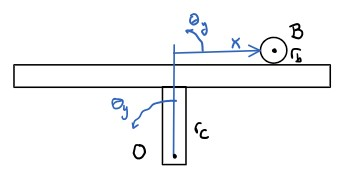

In [198]:
Image(filename = "Images/9Pgeo.jpg", width=400)

The position fo the ball is given by: <br>

> $ \vec R_b = - (r_c + r_b) 
\sin(\theta_y) \hat i + (r_c + r_b) \cos(\theta_y) \hat k + x \cos(\theta_y) \hat i + x \sin(\theta_y) \hat k $

If we separate this motion into two motions parallel and perpendicular to the platform, we then have: <br>

> $\hat n_z = -\sin(\theta_y) \hat i + \cos(\theta_y) \hat k $ <br>
> $\hat n_x = \cos(\theta_y) \hat i + \sin(\theta_y) \hat k $

In [199]:
O = vector.ReferenceFrame('O')
r = sympy.Symbol('(r_{c} + r_{b})')
x_s = sympy.Symbol('x_static')
x, theta = vector.dynamicsymbols('x_b theta_y')
P = O.orientnew('P', 'Axis', [theta, O.y])
R_b = r*P.z + x*P.x
R_b

We will then consider two motions for the ball: <br>

- The velocity of the ball with respect to a static platform: <br>

In [200]:
V_bp = vector.time_derivative(R_b, P)
V_bp

- The velocity of the static ball on a rotating platform:

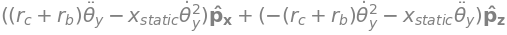

In [201]:
R_b_static = r*P.z + x_s*P.x
V_p = vector.time_derivative(R_b_static, O, 2)
V_p

It follows that the velocity of the ball with respect to the origin is:

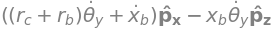

In [202]:
V_b = vector.time_derivative(R_b, O)
V_b

We can then calculate the acceleration of the ball. 
 
- The acceletation of the ball with respect to a static platform

In [203]:
A_bp = vector.time_derivative(R_b, P, 2)
A_bp

- The acceleration of the static ball on a moving platform

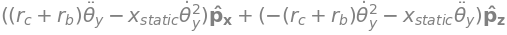

In [204]:
A_p =  vector.time_derivative(R_b_static, O, 2)
A_p

- The corriolis effect <br>

These three accelerations sum to the acceleration of the ball with respect to the platform pivot point $O$:

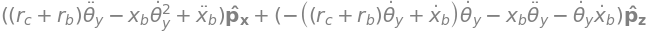

In [205]:
A_b = vector.time_derivative(R_b, O, 2)
A_b

We also have from the no-slip condition that the linear velocity of the ball along the platform varies directly with the angular velocity of the ball: <br>

> $\dot x_b = r_b \dot \theta_b$ <br>
> $\ddot x_b = r_b \ddot \theta_b$ <br>


The center of mass of the platform is at 

In [206]:
r_G = sympy.Symbol('r_G')
R_G = r_G*P.z
R_G

Since the platform only pivots about point $O$, the linear acceleration of the center of mass of the platform is at

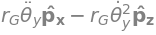

In [207]:
A_G = vector.time_derivative(R_G, O, 2)
A_G

### Relationship between applied motor torque and corresponding apparent moment at $O$

Next, we will determine the relationship between the applied motor torque $T_X$ and the correspponding apparent moment at $O$, $M_y$. <br>

If we look at the motor arm and push rod assembly, we assumed that neither element has any mass, so by principal of virtual work, the work done by  motor completely translates to the work done on the platform. <br> 

Therefore we have:

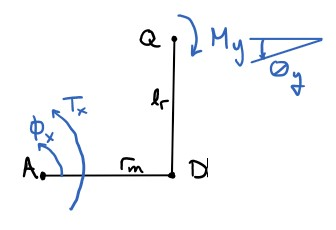

In [208]:
Image(filename = "Images/10Pgeo.jpg", width=300)

> $ d W_{in} = d W_{out} $ <br>

Plugging in the work yields:

> $ T_x (d \phi_x) = M_y (d \theta_y) $ <br>

In time rate form this is:

> $ T_x \Big(\frac {d \phi_x} {d t}\Big) = M_y \Big(\frac {d \theta_y} {d t} \Big) $ <br>

> $ T_x (\dot \phi_x) = M_y (\dot \theta_y) $ <br>

Therefore the apparent moment on the platform is:

> $ M_y = T_x \Big ( \frac {\dot \phi_x} {\dot \theta_y} \Big) $ 

From the relationship between motor angle and platform angle

> $ M_y = - T_x \Big ( \frac {\ell_p} {r_m} \Big) $ 


### Equations of motion for the ball and platform

Next, We will develop the equations of motion for the ball and platform. <br>

First, we will isolate the ball and take the moment about point $b$.

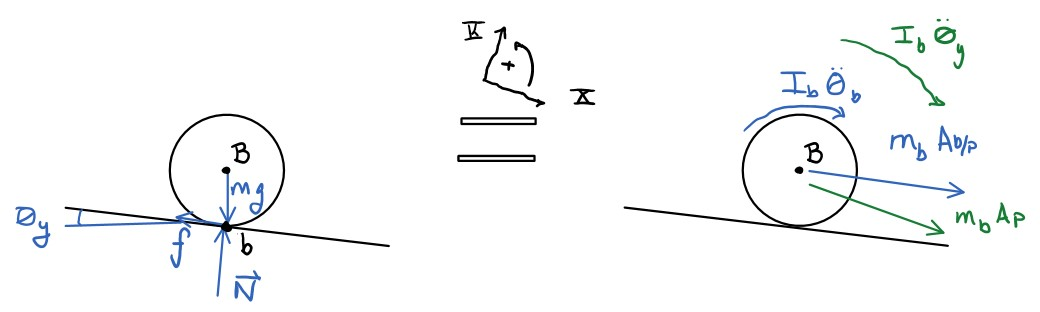

In [209]:
Image(filename = "Images/11Bfbd.jpg", width=500)

First we will sum the torques about point $b$ <br>

Since friction and the normal force are acting on the ball at the point we are summing about, we only have a torque caused by the gravity acting on the ball.

In [210]:
m_b = sympy.Symbol('m_b')
g = sympy.Symbol('g')
r_b = sympy.Symbol('r_b')

F_G_b = m_b*g*O.z
F_G_b

In [211]:
F_G_b = vector.functions.express(F_G_b, P)
F_G_b

To find the torque we will cross gravity with the vector to the center of mass

In [212]:
r_b_P = r_b*P.z
r_b_P

Therefore the sum of torques is:

In [213]:
T_b = r_b_P^F_G_b
T_b

Next, we will sum the moments about point $b$. Recall that $\ddot \theta_b = \frac {\ddot x_b } {r_b}$

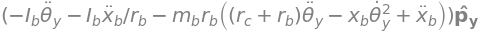

In [214]:
I_b = sympy.Symbol('I_b')
M_b = -((I_b*P.z) ^ vector.time_derivative(R_b, P, 2)/r_b) \
- ((I_b*P.z) ^ vector.time_derivative(P.z, O, 2)) \
- (m_b*(r_b_P^A_b))

# Angular Momentum of ball due to angular acceleration caused by rolling on platform
# Angular Momentum of ball due to being on rotating platform
# Angular Momentum of ball due to linear acceleration

M_b

***
Next, we will isolate the ball and the platform and take the moment about point $O$.

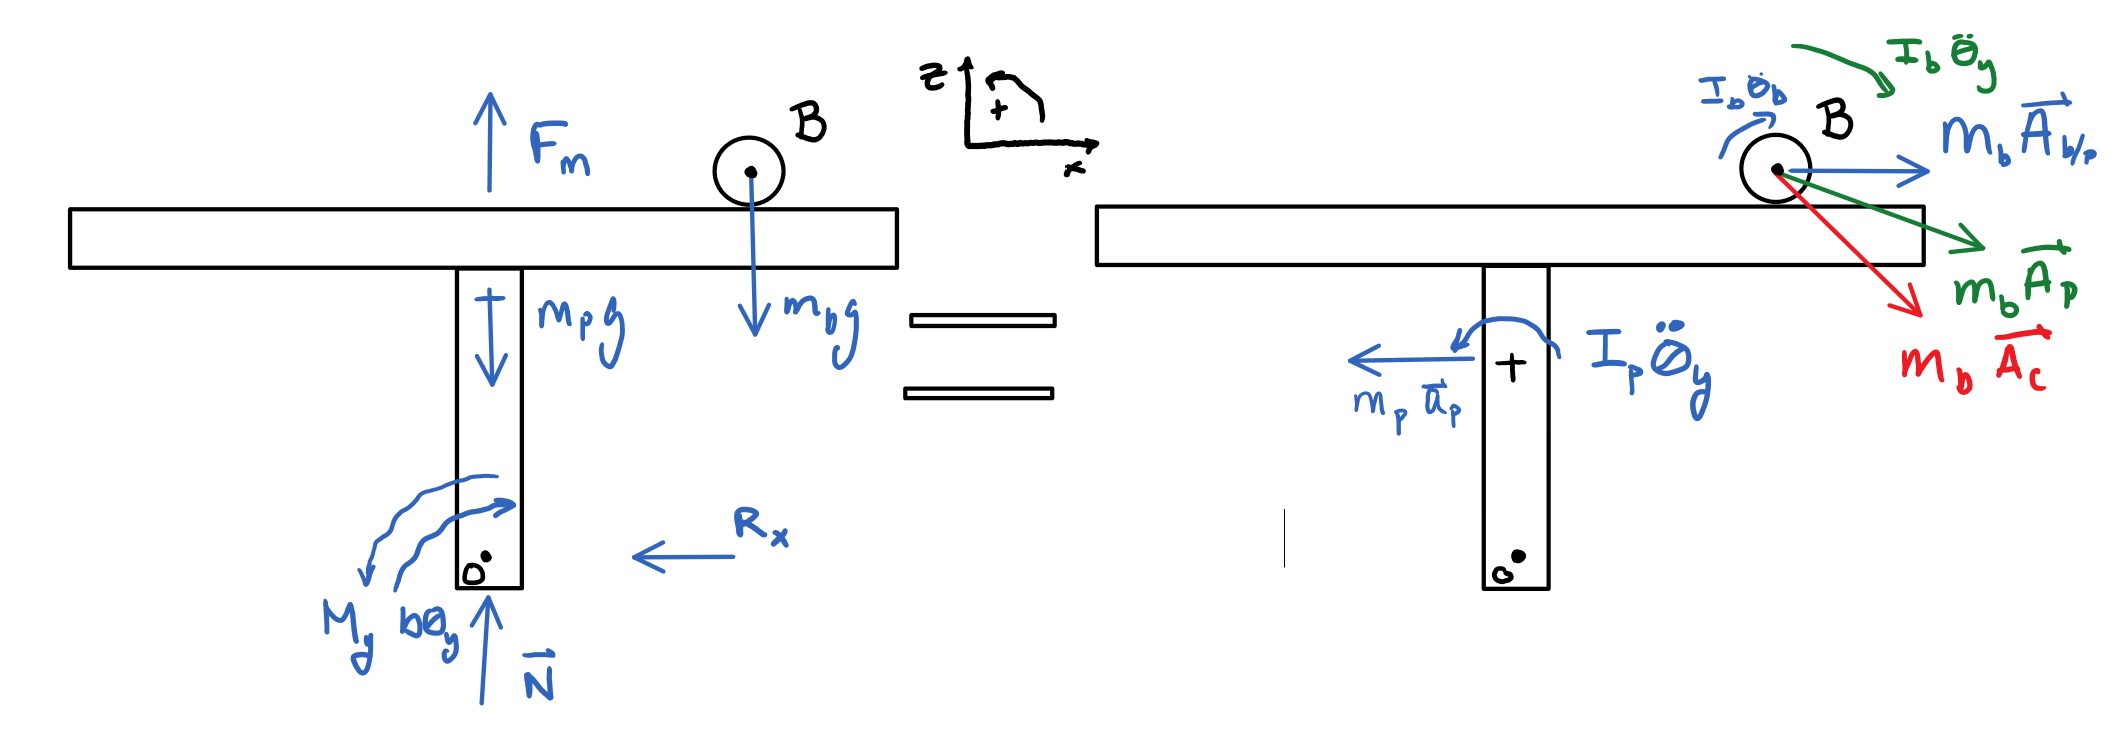

In [215]:
Image(filename = "Images/12Pfbd.jpg", width=500)

First, we will sum the torques about point $O$

Since the reaction forces are acting on the platform at the point we are summing about, we only have the torques caused by the gravity acting on the ball and platform, the apparent moment, and the friction at the pivot point.

In [216]:
m_p = sympy.Symbol('m_P')
I_P = sympy.Symbol('I_P')

F_G_P = m_p*g*O.z
F_G_P

In [217]:
F_G_P = vector.functions.express(F_G_P, P)
F_G_P

To find the torque acting on the platformcaused by gravity, we will cross the gravity force vector with the vector to the center of mass of the platform and sum it with the similar cross product for the mass of the ball.

In [218]:
gravity = (R_G^F_G_P) + (R_b^F_G_b)
gravity = vector.functions.express(gravity, P)
gravity

We also have the Apparent Moment and the viscous friction force.

In [219]:
T_x = sympy.Symbol('T_x')
l_p = sympy.Symbol('\ell_P')
r_m = sympy.Symbol('r_m')

M_y = T_x*(l_p/r_m)*P.y
M_y

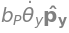

In [220]:
b = sympy.Symbol('b_P')
f = vector.cross(b*P.z, vector.time_derivative(P.z, O, 1))
f

Therefore, the sum of torques acting on the platform is:

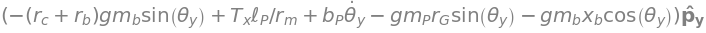

In [221]:
T_P = gravity + M_y + f
T_P

Next, we will sum the moments about point $O$. Recall that $\ddot \theta_b = \frac {\ddot x_b } {r_b}$

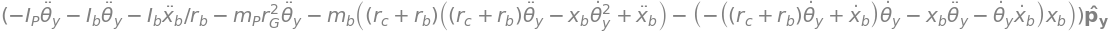

In [222]:
I_P = sympy.Symbol('I_P')
M_P = -((I_b*P.z) ^ vector.time_derivative(R_b, P, 2)/r_b) \
- ((I_b*P.z) ^ vector.time_derivative(P.z, O, 2))\
- (m_b*vector.cross(R_b, A_b))\
- ((I_P*P.z) ^ vector.time_derivative(P.z, O, 2)) \
- (m_p*vector.cross(R_G, A_G)) 

# Angular Momentum of ball due to angular acceleration caused by rolling on platform
# Angular Momentum of ball due to being on rotating platform
# Angular Momentum of ball due to linear acceleration
# Angular Momentum of platform due to rotation
# Angular Momentum of platform due to linear acceleration

M_P

***
## Model Linearization

Next, we will linearize the derived model. We will first derive a nonlinear 2nd-order equations, then we will convert them into linear uncoupled 1st order equations.

###  Nonlinear 2nd-order equations

To do this, we will solve the equations such that all terms with $\ddot x$ and $\ddot\theta_y$ are on one side and everything else is on the other side.

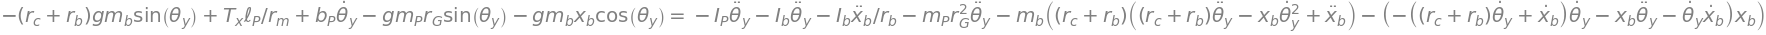

In [223]:
xdot = sympy.diff(x)
x_ddot = sympy.diff(xdot)
thetadot = sympy.diff(theta)
theta_ddot = sympy.diff(thetadot)

Eq1 = T_P.dot(P.y) - M_P.dot(P.y)
sympy.Eq(T_P.dot(P.y), M_P.dot(P.y))

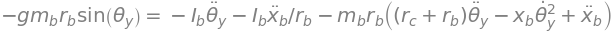

In [224]:
Eq2 = T_b.dot(P.y) - M_b.dot(P.y)
sympy.Eq(T_b.dot(P.y), M_b.dot(P.y))

Then, we will set up a matrix of the form:
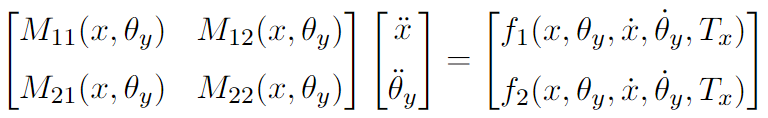

In [225]:
M11 = -Eq1.expand().coeff(x_ddot)
M11

In [226]:
M12 = -Eq1.expand().coeff(theta_ddot)
M12

In [227]:
M21 = -Eq2.expand().coeff(x_ddot)
M21

In [228]:
M22 = -Eq2.expand().coeff(theta_ddot)
M22

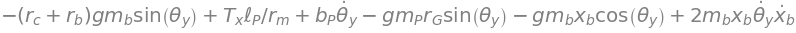

In [229]:
F1 = +Eq1.expand().coeff(x_ddot, 0) + \
sympy.expand(theta_ddot * M12)
F1

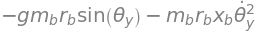

In [230]:
F2 = +Eq2.expand().coeff(x_ddot, 0) + \
sympy.expand(theta_ddot * M22)
F2

Therefore we have the matricies:

In [231]:
M = sympy.Matrix([[M11, M12], [M21, M22]])
M

⎡                       I_b                   2                          2    
⎢-(r_{c} + r_{b})⋅m_b - ───  - (r_{c} + r_{b}) ⋅m_b - I_P - I_b - m_P⋅r_G  - m
⎢                       r_b                                                   
⎢                                                                             
⎢       I_b                                                                   
⎢     - ─── - m_b⋅r_b                     -(r_{c} + r_{b})⋅m_b⋅r_b - I_b      
⎣       r_b                                                                   

      2⎤
_b⋅x_b ⎥
       ⎥
       ⎥
       ⎥
       ⎥
       ⎦

In [232]:
F = sympy.Matrix([[F1], [F2]])
F

⎡                                  Tₓ⋅\ell_P                                  
⎢-(r_{c} + r_{b})⋅g⋅m_b⋅sin(θ_y) + ───────── + b_P⋅θ_̇y - g⋅m_P⋅r_G⋅sin(θ_y) -
⎢                                      rₘ                                     
⎢                                                                             
⎢                                                                           2 
⎣                                      -g⋅m_b⋅r_b⋅sin(θ_y) - m_b⋅r_b⋅x_b⋅θ_̇y 

                                      ⎤
 g⋅m_b⋅x_b⋅cos(θ_y) + 2⋅m_b⋅x_b⋅θ_̇y⋅x_̇b⎥
                                      ⎥
                                      ⎥
                                      ⎥
                                       ⎦

### Linear uncoupled 1st order equations

Next, we will convert this to a set of linear uncoupled 1st order equations using Jacobian Linearization. First we will set<br>
 
> $ \ddot q = M^{-1} f ( q, \dot q, u ) $

In [233]:
q_ddot = (M.inv())*F
q_ddot

⎡     ⎛                       2          ⎞ ⎛                                  
⎢   ⎝(r_{c} + r_{b})⋅m_b⋅r_b  + I_b⋅r_b⎠⋅⎜-(r_{c} + r_{b})⋅g⋅m_b⋅sin(θ_y) + ──
⎢                                          ⎝                                  
⎢─────────────────────────────────────────────────────────────────────────────
⎢               2                                                             
⎢(r_{c} + r_{b}) ⋅I_b⋅m_b - 2⋅(r_{c} + r_{b})⋅I_b⋅m_b⋅r_b + I_P⋅I_b + I_P⋅m_b⋅
⎢                                                                             
⎢              ⎛              2⎞ ⎛                                  Tₓ⋅\ell_P 
⎢             ⎝-I_b - m_b⋅r_b ⎠⋅⎜-(r_{c} + r_{b})⋅g⋅m_b⋅sin(θ_y) + ───────── +
⎢                                ⎝                                      rₘ    
⎢─────────────────────────────────────────────────────────────────────────────
⎢               2                                                             
⎣(r_{c} + r_{b}) ⋅I_b⋅m_b - 2⋅(r_{c} + r_{b})⋅I_b⋅m_

In [234]:
q_dot = sympy.Matrix([[xdot], [thetadot]])
q_dot

⎡x_̇b⎤
⎢   ⎥
⎣θ_̇y⎦

Then we will define the state space: <br>

> $ X = \begin{bmatrix} q \\ \dot q \end{bmatrix} $ <br>

> $ \frac {d} {dt} X = \frac {d} {dt}  \begin{bmatrix} q \\ \dot q \end{bmatrix} $<br>

> $ \frac {d} {dt} X = \begin{bmatrix} \dot q \\ \ddot q \end{bmatrix} $ <br>

Therefore we have:

In [235]:
X_dot = sympy.Matrix([[q_dot], [q_ddot]])
X_dot

⎡                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢     ⎛                       2          ⎞ ⎛                                  
⎢   ⎝(r_{c} + r_{b})⋅m_b⋅r_b  + I_b⋅r_b⎠⋅⎜-(r_{c} + r_{b})⋅g⋅m_b⋅sin(θ_y) + ──
⎢                                          ⎝                                  
⎢─────────────────────────────────────────────────────────────────────────────
⎢               2                                                             
⎢(r_{c} + r_{b}) ⋅I_b⋅m_b - 2⋅(r_{c} + r_{b})⋅I_b⋅m_b⋅r_b + I_P⋅I_b + I_P⋅m_b⋅
⎢                                                                             
⎢              ⎛              2⎞ ⎛                                  Tₓ⋅\ell_P 
⎢             ⎝-I_b - m_b⋅r_b ⎠⋅⎜-(r_{c} + r_{b})⋅g⋅

Then finaly, we will linearize the system using Jacobian Linearization. For <br>

> $ \dot X = g(X,U) $ <br>

Where 

> $ \vec X = \begin{bmatrix} x_b \\ \theta_y \\ \dot x_b \\ \dot \theta_y \end{bmatrix} $ <br>
> $ \vec U = -K \vec X = - \begin{bmatrix} K_1 , K_2, K_3, K_4 \end{bmatrix}
\begin{bmatrix} x_b \\ \theta_y \\ \dot x_b \\ \dot \theta_y \end{bmatrix} $ 

For 

> $ \frac {d} {dt} X \approx A \vec X + B \vec U $

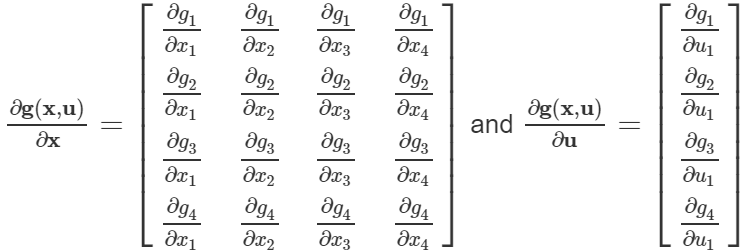

In [236]:
A = sympy.Matrix([[diff(X_dot[0],x), diff(X_dot[0],theta), diff(X_dot[0],xdot), diff(X_dot[0],thetadot)], \
                  [diff(X_dot[1],x), diff(X_dot[1],theta), diff(X_dot[1],xdot), diff(X_dot[1],thetadot)], \
                  [diff(X_dot[2],x), diff(X_dot[2],theta), diff(X_dot[2],xdot), diff(X_dot[2],thetadot)], \
                  [diff(X_dot[3],x), diff(X_dot[3],theta), diff(X_dot[3],xdot), diff(X_dot[3],thetadot)]])
A

⎡                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                   ⎛         
⎢                                                        2⋅m_b⋅r_b⋅⎝-g⋅m_b⋅r_b
⎢- ───────────────────────────────────────────────────────────────────────────
⎢                 2                                                           
⎢  (r_{c} + r_{b}) ⋅I_b⋅m_b - 2⋅(r_{c} + r_{b})⋅I_b⋅m_b⋅r_b + I_P⋅I_b + I_P⋅m_
⎢                                                                             
⎢                                                                             
⎢                                                   

In [237]:
B = sympy.Matrix([[diff(X_dot[0],T_x)], \
                  [diff(X_dot[1],T_x)], \
                  [diff(X_dot[2],T_x)], \
                  [diff(X_dot[3],T_x)]])
B

⎡                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                     ⎛       
⎢                                                              \ell_P⋅⎝(r_{c} 
⎢─────────────────────────────────────────────────────────────────────────────
⎢   ⎛               2                                                         
⎢rₘ⋅⎝(r_{c} + r_{b}) ⋅I_b⋅m_b - 2⋅(r_{c} + r_{b})⋅I_b⋅m_b⋅r_b + I_P⋅I_b + I_P⋅
⎢                                                                             
⎢                                                                             
⎢                                                                        \ell_
⎢───────────────────────────────────────────────────

## Simulation numerical parameters applied to simulation

We were given the following numerical parameters for our simulation. 

In [238]:
# given values
_r_m = 60e-3 # m
_l_r = 50e-3 # m
_r_B = 10.5e-3 # m
_r_G = 42e-3 # m
_l_P = 110e-3 # m
_r_P = 32.5e-3 # m
_r_C = 50e-3 # m
_m_B = 30e-3 # kg
_m_P = 400e-3 # kg
_I_P = 1.88e-3 # kg m^2
_b = 10e-3 #  Nms/rad
_g = 9.8 # m/s^2

We will now use these parameters to evaluate $A$ and $B$ for <br>

> $\vec X | _{x_0 = 0, u_0 = 0}$ and $\vec U | _{x_0 = 0, u_0 = 0} $

In [239]:
_x_0 = 0
_theta_0 = 0
_xdot_0 = 0
_thetadot_0 = 0

_T_x = 0

_A = A.subs([(r_m, _r_m), (r_b, _r_B), (r_G, _r_G),\
             (l_p, _l_P), (r, _r_C+_r_B), (m_b, _m_B), \
             (m_p, _m_P), (I_P, _I_P), (b, _b), (g, _g), \
             (I_b, 2/5*_m_B*(_r_B**2)), (T_x, _T_x),\
             (xdot, _xdot_0), (thetadot, _thetadot_0),\
             (x, _x_0), (theta, _theta_0)])

_A = np.array(_A.tolist(), dtype=np.float64) 

_A

array([[  0.        ,   0.        ,   1.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   1.        ],
       [ -5.21168051,   4.00700633,   0.        ,   0.17726804],
       [112.77206672,  64.76338689,   0.        ,  -3.83578458]])

In [240]:
_B = B.subs([(r_m, _r_m), (r_b, _r_B), (r_G, _r_G),\
             (l_p, _l_P), (r, _r_C+_r_B), (m_b, _m_B), \
             (m_p, _m_P), (I_P, _I_P), (b, _b), (g, _g), \
             (I_b, 2/5*_m_B*(_r_B**2)), (T_x, _T_x),\
             (xdot, _xdot_0), (thetadot, _thetadot_0),\
             (x, _x_0), (theta, _theta_0)])
_B = np.array(_B.tolist(), dtype=np.float64) 

_B

array([[   0.        ],
       [   0.        ],
       [  32.49914151],
       [-703.22717343]])

## Simulation Results

We can then input our $A$ and $B$ matricies into the model assuming that: <br>

> $ \frac {d} {dt} X = A \vec X + B \vec U $

We have two simulations that we want to test out. 
- Open loop where there is no external torque applied by the motor.
- Closed loop where the motor is applying an external torque to the motor.

### Open Loop Simulation

For the open loop simulation we take out the $Bu$ term since $T_x = 0$

Our first open loop simulation will have the ball centered perfectly over the center of mass of the platform.

<function matplotlib.pyplot.show(close=None, block=None)>

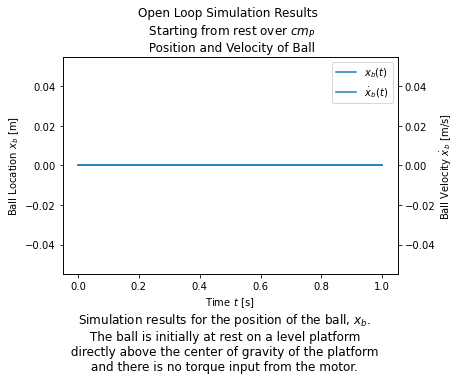

In [241]:
def fun(t, X):
    Xdot = np.matmul(_A,X)
    return Xdot

tspan = [0,1]
X_0 = np.array([0, 0, 0, 0])

XOL1sol = solve_ivp(fun, tspan, X_0, rtol=1e-9, atol=1e-9)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
l1 = ax1.plot(XOL1sol.t, XOL1sol.y[0], label=f'$x_b(t)$')
l2 = ax2.plot(XOL1sol.t, XOL1sol.y[2], label=f'$\dot x_b(t)$')
plt.title('Open Loop Simulation Results \n Starting from rest over $cm_P$ \n Position and Velocity of Ball')
ax1.set_ylabel('Ball Location $x_b$ [m]')
ax2.set_ylabel('Ball Velocity $\dot x_b$ [m/s]')
ax1.set_xlabel('Time $t$ [s]') # the horizontal axis represents the time 

# show how the colors correspond to the components of X
lns = l1+l2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)
txt="Simulation results for the position of the ball, $x_b$.\n \
The ball is initially at rest on a level platform \n \
directly above the center of gravity of the platform \n \
and there is no torque input from the motor. "
plt.figtext(0.5, -0.2, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show

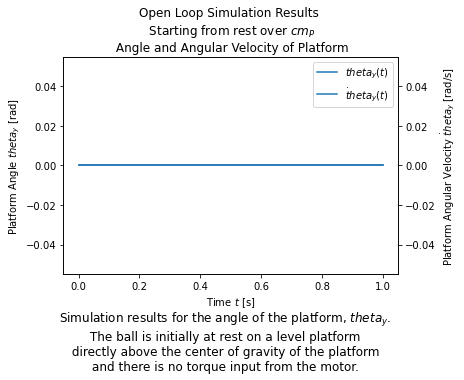

In [242]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
l1 = ax1.plot(XOL1sol.t, XOL1sol.y[1], label=f'$ theta _y(t)$')
l2 = ax2.plot(XOL1sol.t, XOL1sol.y[3], label=f'$\dot theta _y (t)$')
plt.title('Open Loop Simulation Results \n Starting from rest over $cm_P$ \n Angle and Angular Velocity of Platform')
ax1.set_ylabel('Platform Angle $theta_y$ [rad]')
ax2.set_ylabel('Platform Angular Velocity $\dot theta_y$ [rad/s]')
ax1.set_xlabel('Time $t$ [s]') # the horizontal axis represents the time 

# show how the colors correspond to the components of X
lns = l1+l2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)
txt="Simulation results for the angle of the platform, $theta_y$.\n \
The ball is initially at rest on a level platform \n \
directly above the center of gravity of the platform \n \
and there is no torque input from the motor. "
plt.figtext(0.5, -0.2, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

This simulation makes sense. If the ball is placed on the level platform already perfectly balanced, then there is no applied torque due to gravity. Since there is no external force applied to the ball, it will not move.

Our second open loop simulation will have the ball initially at rest on a level platform offset horizontally from the center of gravity of the platform by 5 [$cm$] and without a  torque input from the motor. 

<function matplotlib.pyplot.show(close=None, block=None)>

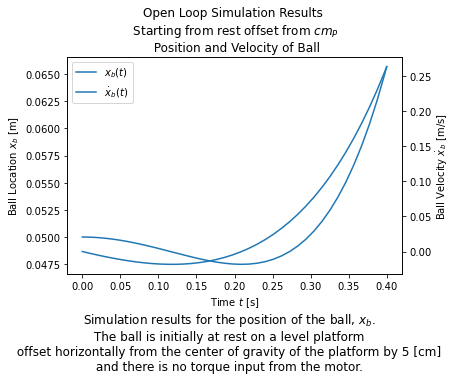

In [243]:
def fun(t, X):
    Xdot = np.matmul(_A,X)
    return Xdot

tspan = [0,0.4]
X_0 = np.array([0.05, 0, 0, 0])

XOL2sol = solve_ivp(fun, tspan, X_0, rtol=1e-9, atol=1e-9)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
l1 = ax1.plot(XOL2sol.t, XOL2sol.y[0], label=f'$x_b(t)$')
l2 = ax2.plot(XOL2sol.t, XOL2sol.y[2], label=f'$\dot x_b(t)$')
plt.title('Open Loop Simulation Results \n Starting from rest offset from $cm_P$ \n Position and Velocity of Ball')
ax1.set_ylabel('Ball Location $x_b$ [m]')
ax2.set_ylabel('Ball Velocity $\dot x_b$ [m/s]')
ax1.set_xlabel('Time $t$ [s]') # the horizontal axis represents the time 

# show how the colors correspond to the components of X
lns = l1+l2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)
txt="Simulation results for the position of the ball, $x_b$.\n \
The ball is initially at rest on a level platform \n \
offset horizontally from the center of gravity of the platform by 5 [cm] \n \
and there is no torque input from the motor. "
plt.figtext(0.5, -0.2, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show

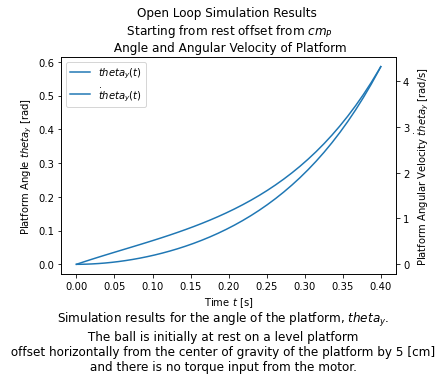

In [244]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
l1 = ax1.plot(XOL2sol.t, XOL2sol.y[1], label=f'$ theta _y(t)$')
l2 = ax2.plot(XOL2sol.t, XOL2sol.y[3], label=f'$\dot theta _y (t)$')
plt.title('Open Loop Simulation Results \n Starting from rest offset from $cm_P$ \n Angle and Angular Velocity of Platform')
ax1.set_ylabel('Platform Angle $theta_y$ [rad]')
ax2.set_ylabel('Platform Angular Velocity $\dot theta_y$ [rad/s]')
ax1.set_xlabel('Time $t$ [s]') # the horizontal axis represents the time 

# show how the colors correspond to the components of X
lns = l1+l2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)
txt="Simulation results for the angle of the platform, $theta_y$.\n \
The ball is initially at rest on a level platform \n \
offset horizontally from the center of gravity of the platform by 5 [cm] \n \
and there is no torque input from the motor. "
plt.figtext(0.5, -0.2, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

This simulation makes sense. If the ball is placed on the level platform offset from the center of mass of the platform without any applied torque from the motors, then the only applied torque is due to gravity. Since there is no applied torque to resist this moment, the platform will turn towards the side with the ball which prompts the ball to move further from the center of the plate and the plate to more quickly rotate.

### Closed Loop Simulation

For the closed loop simulation, we implement a regulator using full state feedback. That is, we use $u = -Kx$ for 

> $ \frac {d} {dt} X = A \vec X + B \vec U $

In matrix notation, $u = -Kx$ can be expressed as

> $ \vec U = - \begin{bmatrix} K_1 , K_2, K_3, K_4 \end{bmatrix}
\begin{bmatrix} x_b \\ \theta_y \\ \dot x_b \\ \dot \theta_y \end{bmatrix} $ 

We have been given the gains for this controller. The individual gains in the $K$ matrix shown above are in SI units matching the states and input. That is, going left-to-right, the units for $K_1$ through $K_4$ are $[N], [N ·m], [N ·s],$ and $[N ·m ·s]$ respectively.

These gains implement a nearly fuel-optimal controller; that is, these gains stabilize the system while minimizing the amount of actuation effort required for stability. These gains will therefore not offer high performance and would be expected to oscillate significantly.

Our closed loop simulation will have the ball initially at rest on a level platform offset horizontally from the center of gravity of the platform by 5 [$cm$]; however, there will be torque input from the motor.

Text(413.375, 0.5, 'Ball Velocity $\\dot x_b$ [m/s]')

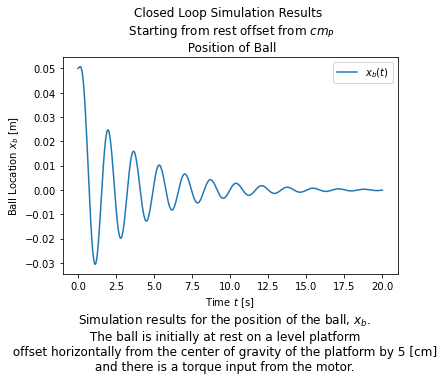

In [245]:
def fun(t, X):
    K =  np.array([[-0.3, -0.2, -0.05, -0.02]])
    T = -K @ X
    Xdot = np.add(np.matmul(_A,X), np.matmul(_B , T))
    return Xdot

tspan = [0,20]
X_0 = np.array([0.05, 0, 0, 0])

XCLsol = solve_ivp(fun, tspan, X_0, rtol=1e-9, atol=1e-9)

fig, ax1 = plt.subplots()
l1 = ax1.plot(XCLsol.t, XCLsol.y[0], label=f'$x_b(t)$')
plt.title('Closed Loop Simulation Results \n Starting from rest offset from $cm_P$ \n Position of Ball')
ax1.set_ylabel('Ball Location $x_b$ [m]')

ax1.set_xlabel('Time $t$ [s]') # the horizontal axis represents the time 

# show how the colors correspond to the components of X
ax1.legend( loc=0)
txt="Simulation results for the position of the ball, $x_b$.\n \
The ball is initially at rest on a level platform \n \
offset horizontally from the center of gravity of the platform by 5 [cm] \n \
and there is a torque input from the motor. "
plt.figtext(0.5, -0.2, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show

l2 = ax2.plot(XCLsol.t, XCLsol.y[2], label=f'$\dot x_b(t)$')
ax2.set_ylabel('Ball Velocity $\dot x_b$ [m/s]')

<function matplotlib.pyplot.show(close=None, block=None)>

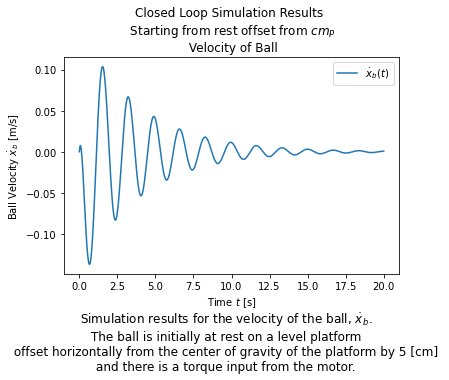

In [246]:
fig, ax2 = plt.subplots()
l2 = ax2.plot(XCLsol.t, XCLsol.y[2], label=f'$\dot x_b(t)$')
plt.title('Closed Loop Simulation Results \n Starting from rest offset from $cm_P$ \n Velocity of Ball')
ax2.set_ylabel('Ball Velocity $\dot x_b$ [m/s]')
ax2.set_xlabel('Time $t$ [s]') # the horizontal axis represents the time 

# show how the colors correspond to the components of X
ax2.legend( loc=0)
txt="Simulation results for the velocity of the ball, $\dot x_b$.\n \
The ball is initially at rest on a level platform \n \
offset horizontally from the center of gravity of the platform by 5 [cm] \n \
and there is a torque input from the motor. "
plt.figtext(0.5, -0.2, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show



<function matplotlib.pyplot.show(close=None, block=None)>

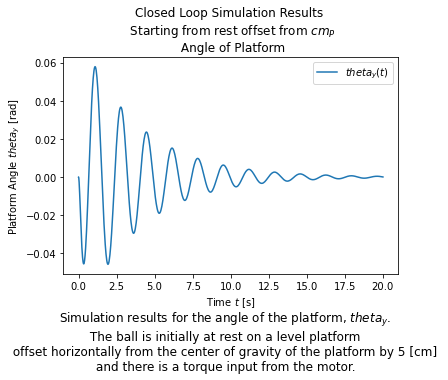

In [247]:
fig, ax = plt.subplots()
l2 = ax.plot(XCLsol.t, XCLsol.y[1], label=f'$theta_y(t)$')
plt.title('Closed Loop Simulation Results \n Starting from rest offset from $cm_P$ \n Angle of Platform')
ax.set_ylabel('Platform Angle $theta_y$ [rad]')
ax.set_xlabel('Time $t$ [s]') # the horizontal axis represents the time 

# show how the colors correspond to the components of X
ax.legend( loc=0)
txt="Simulation results for the angle of the platform, $theta_y$.\n \
The ball is initially at rest on a level platform \n \
offset horizontally from the center of gravity of the platform by 5 [cm] \n \
and there is a torque input from the motor. "
plt.figtext(0.5, -0.2, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

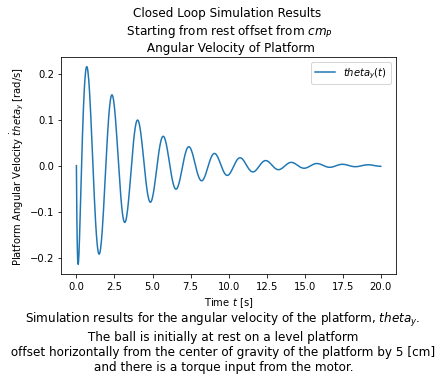

In [248]:
fig, ax = plt.subplots()
l2 = ax.plot(XCLsol.t, XCLsol.y[3], label=f'$theta_y(t)$')
plt.title('Closed Loop Simulation Results \n Starting from rest offset from $cm_P$ \n Angular Velocity of Platform')
ax.set_ylabel('Platform Angular Velocity $\dot theta_y$ [rad/s]')
ax.set_xlabel('Time $t$ [s]') # the horizontal axis represents the time 

# show how the colors correspond to the components of X
ax.legend( loc=0)
txt="Simulation results for the angular velocity of the platform, $theta_y$.\n \
The ball is initially at rest on a level platform \n \
offset horizontally from the center of gravity of the platform by 5 [cm] \n \
and there is a torque input from the motor. "
plt.figtext(0.5, -0.2, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show

The simulation results for the closed loop simulation make sense. As the ball moves, the motor torque will overcorrect and cause the ball to oscillate until the system hits an equilibrium point with the ball in the center of the platform directly above the platform center of mass.